In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [6]:
df_train = pd.read_csv("/content/sample_data/twitter_validation.csv")
df_val = pd.read_csv("/content/sample_data/twitter_validation.csv")

In [7]:
df_train

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
df_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [10]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [29]:
df_train = df_train.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})
df_val = df_val.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})

In [14]:
df_val

,ID,platform,sentimen,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [20]:
print(df_train["sentimen"].value_counts())
print(df_val["sentimen"].value_counts())

sentimen
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64
sentimen
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [21]:
print("Platform Counts - Training")
print(df_train["platform"].value_counts())
print(20*"==")
print("Platform Counts - Validation")
print(df_val["platform"].value_counts())

Platform Counts - Training
platform
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Hearthstone                          32
CS-GO                                32
Facebook                             32
Overwatch                            32
Verizon                              32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota

In [22]:
# We're dropping unneeded columns

df_train = df_train.drop(["ID","platform"], axis=1)
df_val = df_val.drop(["ID","platform"], axis=1)

In [23]:
df_train

,sentimen,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [24]:
df_val

,sentimen,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [25]:
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}")
print(f"missing data: {sum(df_val.isna().sum())}")

Rows: 999, Columns: 2
Duplicates: 1
missing data: 0
Rows: 999, Columns: 2
Duplicates: 1
missing data: 0


In [26]:
kolom1=len(df_train.columns)
for i in range (0, kolom1):
  df_train=df_train[df_train.iloc[:,i]!='?']
  df_train=df_train[df_train.iloc[:,i]!='']
  df_train=df_train[~df_train.iloc[:,i].isna()]
df_train.info()
df_train.drop_duplicates(keep= 'first',inplace = True)

kolom=len(df_val.columns)
for i in range (0, kolom):
  df_val=df_val[df_val.iloc[:,i]!='?']
  df_val=df_val[df_val.iloc[:,i]!='']
  df_val=df_val[~df_val.iloc[:,i].isna()]
df_val.info()
df_val.drop_duplicates(keep= 'first',inplace = True)

print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}")
print(f"missing data: {sum(df_val.isna().sum())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  999 non-null    object
 1   text      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  999 non-null    object
 1   text      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
Rows: 998, Columns: 2
Duplicates: 0
missing data: 0
Rows: 998, Columns: 2
Duplicates: 0
missing data: 0


In [33]:
# Install missing libraries
!pip install emoji

import re
import string
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK terunduh
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')           # kalau belum pernah diunduh
nltk.download('omw-1.4')           # opsional tapi sering diperlukan
nltk.download('punkt')             # untuk tokenisasi, jika kamu pakai word_tokenize()

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kamus singkatan umum (bisa diperluas)
abbreviation_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "i do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "i have",
    "ill": "i will",
    "didnt": "did not",
    "doesnt": "does not",
    "isnt": "is not",
    "wasnt": "was not",
    "havent": "have not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "wouldnt": "would not"
}

def get_wordnet_pos(word):
    """
    Helper function:
    Mengubah POS tag (part-of-speech) menjadi format yang bisa dipakai lemmatizer.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
    """
    Function for text preprocessing for English sentiment analysis.
    Includes:
      - lowercase
      - emoji handling
      - URL and number removal
      - punctuation removal
      - short form expansion
      - stopword removal
      - lemmatization
    """

    # Ensure input is string
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Replace emojis with text description
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand common short forms
    words = text.split()
    expanded_words = [abbreviation_map.get(w, w) for w in words]
    text = ' '.join(expanded_words)

    # Tokenize and remove stopwords + lemmatize
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            pos = get_wordnet_pos(word)
            lemma = lemmatizer.lemmatize(word, pos)
            filtered_words.append(lemma)

    # Join cleaned text
    processed_text = ' '.join(filtered_words)

    # Clean extra whitespace
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_val['clean_text'] = df_val['text'].apply(preprocess_text)

print(df_train[['text', 'clean_text']])

                                                  text  \
0    BBC News - Amazon boss Jeff Bezos rejects clai...   
1    @Microsoft Why do I pay for WORD when it funct...   
2    CSGO matchmaking is so full of closet hacking,...   
3    Now the President is slapping Americans in the...   
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...   
..                                                 ...   
994  ⭐️ Toronto is the arts and culture capital of ...   
995  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
996  Today sucked so it’s time to drink wine n play...   
997  Bought a fraction of Microsoft today. Small wins.   
998  Johnson & Johnson to stop selling talc baby po...   

                                            clean_text  
0    bbc news amazon bos jeff bezos reject claim co...  
1    microsoft pay word function poorly samsungus c...  
2    csgo matchmaking full closet hack truly awful ...  
3    president slap american face really commit unl...  
4    hi eahelp i’v

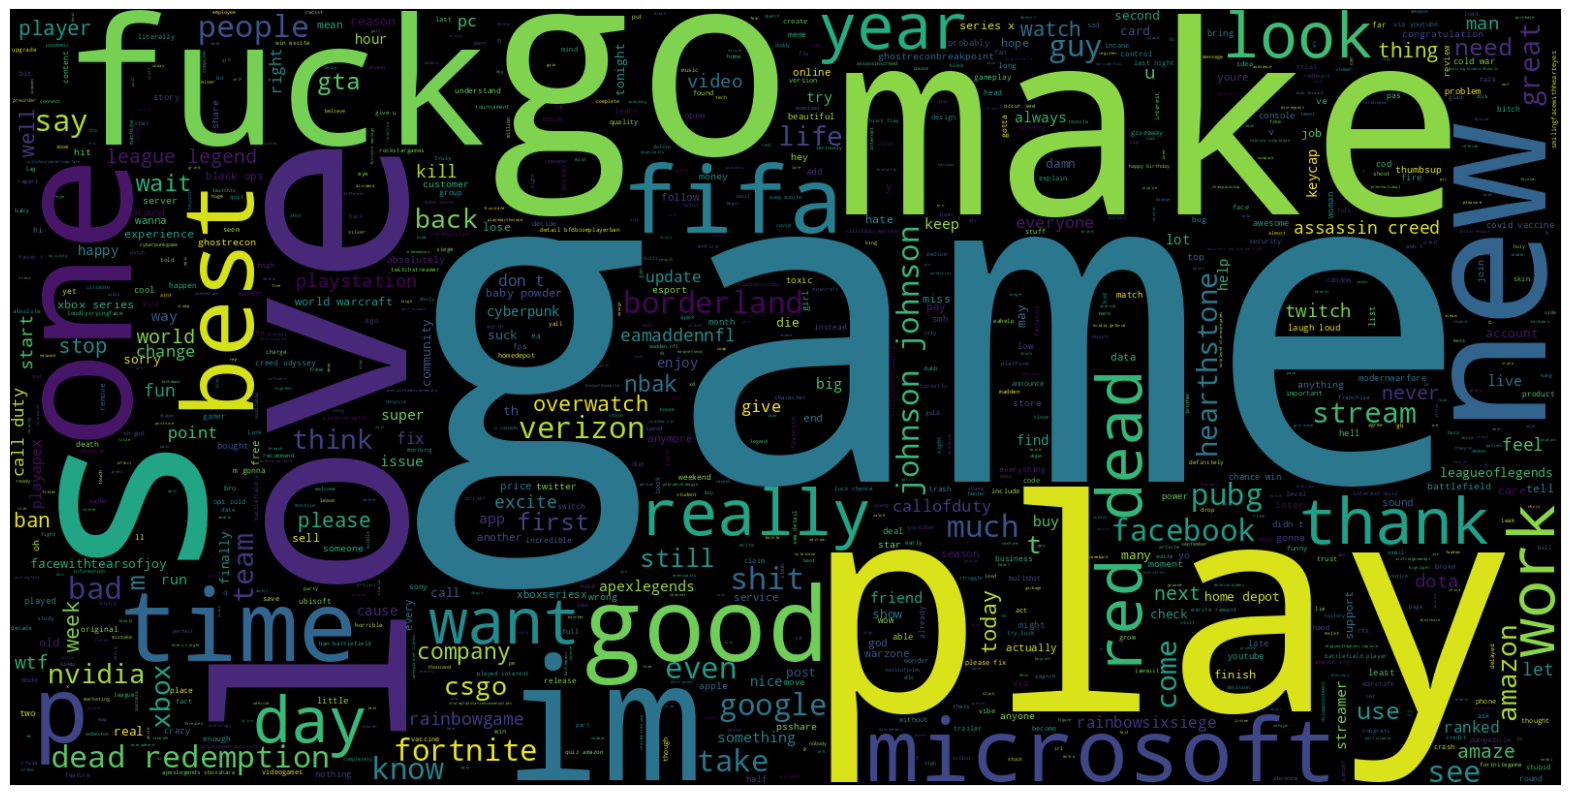

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

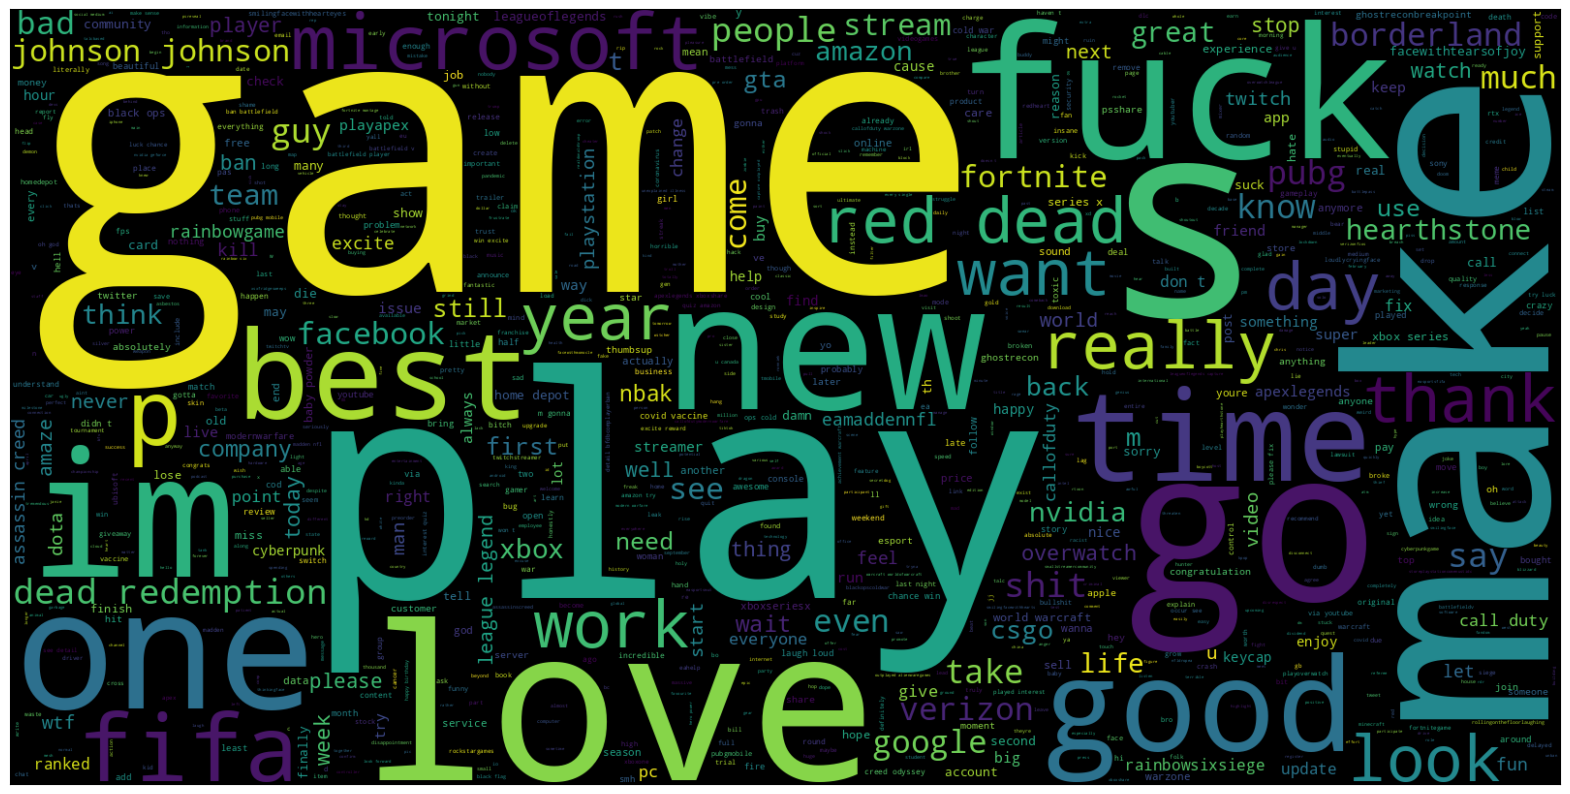

In [37]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define TF-IDF vectorizer (you can tune max_features, ngram_range etc. as needed)
tfidf = TfidfVectorizer(max_features=17000, ngram_range=(1,2))

In [42]:
# Fit TF-IDF on training text and transform train and test text
X_train = tfidf.fit_transform(df_train['clean_text'])
X_test = tfidf.transform(df_val['clean_text'])

# Assuming your sentiment labels are in 'sentimen' column in both dfs
y_train = df_train['sentimen']
y_test = df_val['sentimen']

In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import inspect

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluasi model klasifikasi multi-class:
      - ROC & AUC (macro)
      - Akurasi
      - F1-score (macro)
      - ROC Curve Plot
    Dapat digunakan untuk SVM, Random Forest, Logistic Regression, dll.
    """

    # Prediksi label
    y_pred = model.predict(X_test)

    # Coba ambil skor probabilitas atau decision function
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        decision_scores = model.predict_proba(X_test)
    else:
        raise ValueError(f"Model {model_name} tidak mendukung ROC (butuh decision_function atau predict_proba)")

    # Binarisasi label untuk ROC multi-class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Hitung ROC curve dan AUC untuk tiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # AUC rata-rata (macro)
    roc_auc["macro"] = roc_auc_score(y_test_bin, decision_scores, average="macro", multi_class="ovr")

    # Akurasi dan F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"======= Evaluasi Klasifikasi {model_name} =======")
    print(f"Akurasi Klasifikasi     : {accuracy * 100:.2f}%")
    print(f"F-measure (macro avg)   : {f1:.3f}")
    print(f"AUC rata-rata (macro)   : {roc_auc['macro']:.3f}")
    print("=" * 45)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Garis diagonal (baseline)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        "model": model_name,
        "accuracy": accuracy,
        "f1_macro": f1,
        "auc_macro": roc_auc["macro"]
    }

In [44]:
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9929859719438878
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      0.98      0.99       171
    Negative       1.00      0.99      0.99       266
     Neutral       0.99      1.00      0.99       285
    Positive       0.99      1.00      0.99       276

    accuracy                           0.99       998
   macro avg       0.99      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998



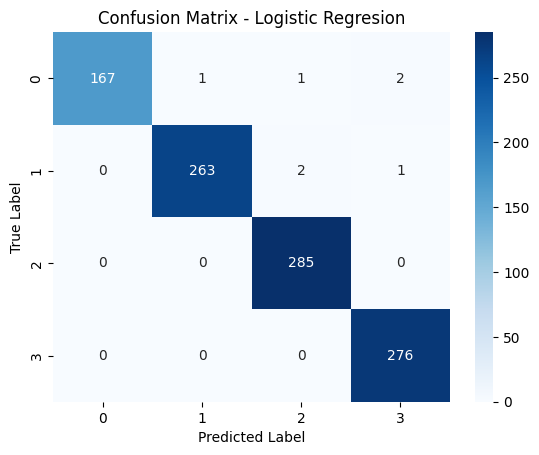

In [45]:
# Predict on test data
y_predlr = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_predlr))
print("Classification Report:\n", classification_report(y_test, y_predlr))

cm = confusion_matrix(y_test, y_predlr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regresion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

======= Evaluasi Klasifikasi Logistic Regresion =======
Akurasi Klasifikasi     : 99.30%
F-measure (macro avg)   : 0.992
AUC rata-rata (macro)   : 1.000


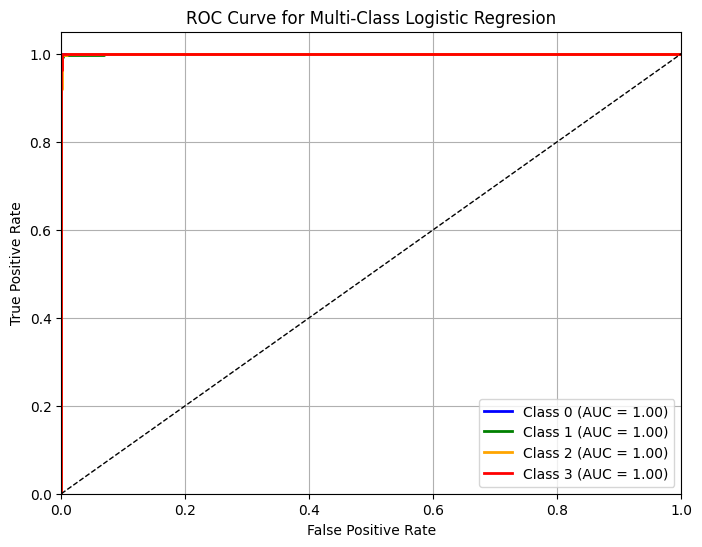

In [46]:
lr_results = evaluate_model(model, X_test, y_test, model_name="Logistic Regresion")

🌳 Melatih Random Forest...

✅ Accuracy (Random Forest): 0.7956

📊 Classification Report (Random Forest):
              precision    recall  f1-score   support

  Irrelevant       1.00      0.27      0.42       171
    Negative       0.91      0.86      0.88       266
     Neutral       0.65      0.99      0.79       285
    Positive       0.88      0.86      0.87       276

    accuracy                           0.80       998
   macro avg       0.86      0.74      0.74       998
weighted avg       0.85      0.80      0.77       998



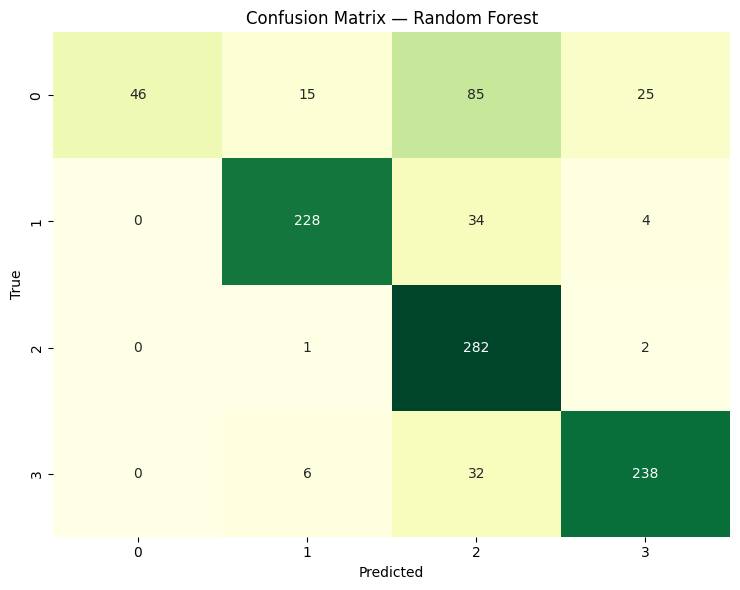

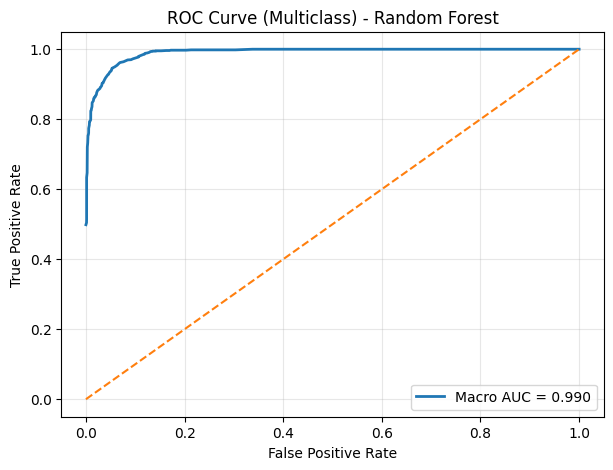

⚙️  Melatih SVM (RBF) dengan StandardScaler...

✅ Accuracy (SVM (RBF)): 0.8948

📊 Classification Report (SVM (RBF)):
              precision    recall  f1-score   support

  Irrelevant       1.00      0.77      0.87       171
    Negative       1.00      0.83      0.91       266
     Neutral       1.00      0.93      0.96       285
    Positive       0.72      1.00      0.84       276

    accuracy                           0.89       998
   macro avg       0.93      0.88      0.90       998
weighted avg       0.92      0.89      0.90       998



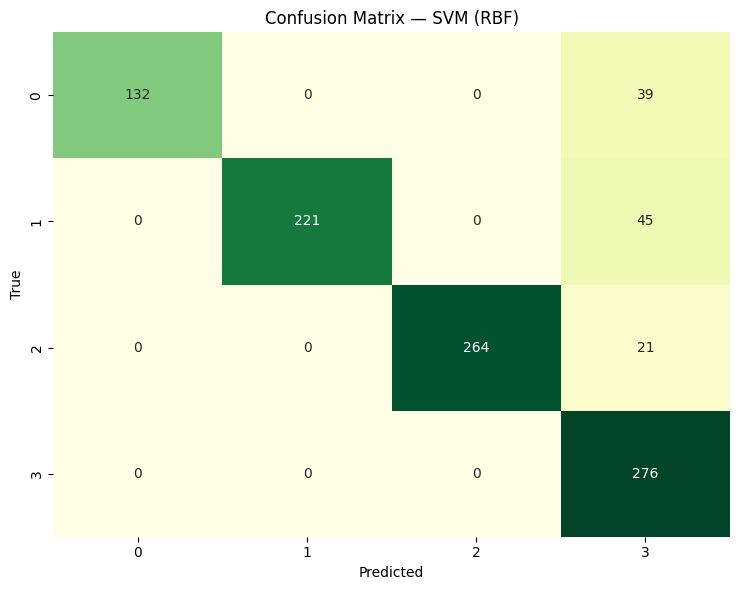

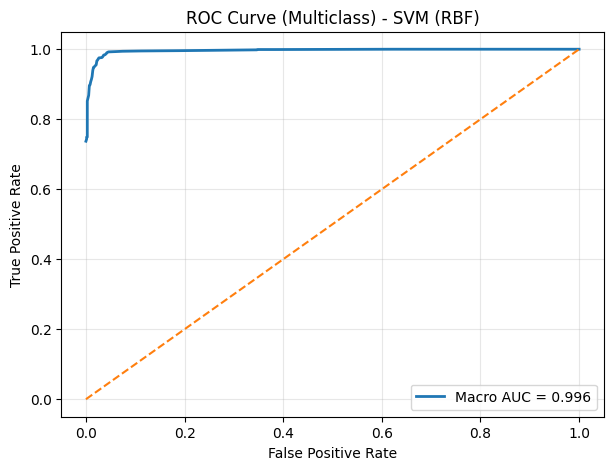

In [49]:
# =========================
# Training Random Forest & SVM (refactor, fungsi setara)
# =========================

# --- Import wajib ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# -------------------------
# Util: plot ROC (binary / multiclass)
# -------------------------
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Menggambar ROC curve (binary/multikelas) dan menampilkan AUC.
    Akan memakai predict_proba jika ada; fallback ke decision_function.
    """
    # Skor probabilitas / decision
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        # Jika bentuknya (n_samples,) untuk binary, ubah ke (n_samples, 1)
        if y_score.ndim == 1:
            y_score = y_score.reshape(-1, 1)
    else:
        print(f"[{model_name}] Tidak bisa menghitung ROC (model tidak menyediakan skor).")
        return

    classes_ = getattr(model, "classes_", None)
    if classes_ is None:
        classes_ = np.unique(y_test)

    # Binarize y_test untuk multiclass
    if len(classes_) == 2:
        # Binary
        # Pastikan y_score kolomnya sesuai positif class index
        # Jika predict_proba: ambil kolom probabilitas kelas positif (index 1)
        if y_score.ndim == 2 and y_score.shape[1] == 2:
            pos_scores = y_score[:, 1]
        else:
            # decision_function satu kolom
            pos_scores = y_score.ravel()

        fpr, tpr, _ = roc_curve(y_test, pos_scores, pos_label=classes_[1])
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        # Multiclass (One-vs-Rest)
        y_bin = label_binarize(y_test, classes=classes_)
        # Jika y_score 1D (tak mungkin untuk multiclass), hentikan
        if y_score.ndim == 1:
            raise ValueError("Skor model 1D padahal masalah multikelas.")

        fpr, tpr, roc_auc = dict(), dict(), dict()
        for i, cls in enumerate(classes_):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Macro-average
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_))]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(len(classes_)):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= len(classes_)
        macro_auc = auc(all_fpr, mean_tpr)

        plt.figure(figsize=(7, 5))
        plt.plot(all_fpr, mean_tpr, linewidth=2, label=f"Macro AUC = {macro_auc:.3f}")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curve (Multiclass) - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()

# -------------------------
# Util: evaluasi umum + confusion matrix
# -------------------------
def evaluate_basic(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n✅ Accuracy ({name}): {acc:.4f}")
    print(f"\n📊 Classification Report ({name}):\n{classification_report(y_test, y_pred)}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7.5, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGn", cbar=False)
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return y_pred

# -------------------------
# Random Forest
# -------------------------
def train_random_forest(X_train, y_train,
                        n_estimators=120,
                        max_depth=20,
                        random_state=42,
                        n_jobs=-1):
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=n_jobs
    )
    print("🌳 Melatih Random Forest...")
    rf.fit(X_train, y_train)
    return rf

# -------------------------
# SVM (dengan scaling)
# -------------------------
def train_svm_rbf(X_train, y_train,
                  C=1.0,
                  gamma="scale",
                  random_state=42):
    svm_clf = Pipeline(steps=[
        ("scaler", StandardScaler(with_mean=False)), # Added with_mean=False
        ("svc", SVC(kernel="rbf", C=C, gamma=gamma, probability=True, random_state=random_state))
    ])
    print("⚙️  Melatih SVM (RBF) dengan StandardScaler...")
    svm_clf.fit(X_train, y_train)
    return svm_clf

# =========================
# ====== EKSEKUSI =========
# =========================
# Asumsi: X_train, X_test, y_train, y_test sudah ada di memori.

# 1) Random Forest
rf_model = train_random_forest(X_train, y_train, n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
_ = evaluate_basic(rf_model, X_test, y_test, name="Random Forest")
evaluate_model(rf_model, X_test, y_test, model_name="Random Forest")

# 2) SVM (RBF)
svm_model = train_svm_rbf(X_train, y_train, C=1.0, gamma="scale", random_state=42)
_ = evaluate_basic(svm_model, X_test, y_test, name="SVM (RBF)")
evaluate_model(svm_model, X_test, y_test, model_name="SVM (RBF)")